# Funcion de Coherencia

## Scratch Implementation

Implementacion de codigo siguiendo la ecuacion

- [Link](https://resources.system-analysis.cadence.com/blog/msa2020-cross-power-spectral-density-spectrum-for-noise-modelling-and-filter-design)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft

2000


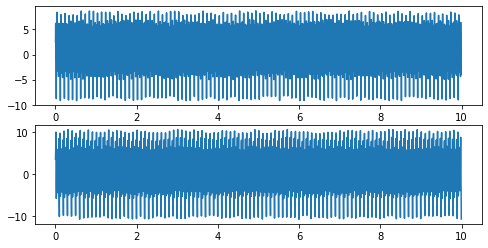

In [2]:
# Creacion de las señales de prueba

Fs = 200

t = np.arange(0,10,1/Fs)

x1 =  3*np.sin(2*np.pi*40*t) + np.random.rand(len(t))
x2 =  4*np.sin(2*np.pi*40*t) + np.random.rand(len(t))

x1 = 5*np.sin(2*np.pi*90*t) + 3*np.sin(2*np.pi*40*t) + 2*np.cos(2*np.pi*30*t) + np.random.rand(len(t))
x2 = 3*np.cos(2*np.pi*90*t) + 4*np.sin(2*np.pi*40*t) + 5*np.sin(2*np.pi*30*t) + np.random.rand(len(t))

N = len(t)
print(N)

plt.figure(figsize=(8, 4))
plt.subplot(2,1,1)
plt.plot(t,x1)
plt.subplot(2,1,2)
plt.plot(t,x2)

### Calculo del periodograma

Para el periodograma se utiliza la siguiente ecuacion

$P_{xx}(f) = \frac{1}{F_s N} |X(f)|^2$

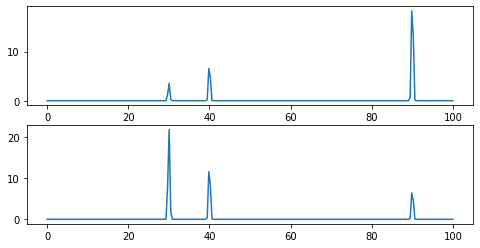

In [3]:
freq, Px1 = signal.welch(x1, Fs, window = 'hamming', nperseg=512, noverlap=None, nfft=None, detrend='constant', axis=-1)
freq, Px2 = signal.welch(x2, Fs, window = 'hamming', nperseg=512, noverlap=None, nfft=None, detrend='constant', axis=-1)

plt.figure(figsize=(8, 4))
plt.subplot(2,1,1)
plt.plot(freq,Px1)
plt.subplot(2,1,2)
plt.plot(freq,Px2)

### Calculo del periodograma cruzado

Para el periodograma cruzado se utiliza la siguiente ecuacion

$P_{xy}(f) = F\{R_{xy}(m)\}= \sum_{m=-\infty}^{\infty}{R_{xy}(m)e^{-jwm}} $

donde $R_{xy}$ es la correlacion cruzada de las señales

$R_{xy}(\tau)=\lim_{T\to\infty}{\frac{1}{T}\int_{0}^{T}{x(t)y(t-\tau)dt}}$

C:\Users\fabian\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


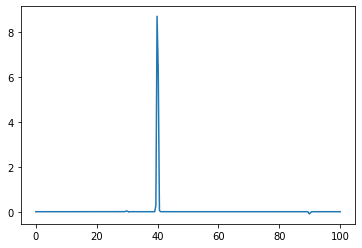

In [4]:
freq, Px1x2 = signal.csd(x1, x2, Fs, window = 'hamming', nperseg=512, noverlap=None, nfft=None, detrend='constant', axis=-1)

plt.plot(freq, Px1x2)

### Calculo de la funcion de Coherencia

$|\Gamma_{xy}(e^{jw})|^2 = \frac{|S{xy}(e^{jw})|^2}{S{x}(e^{jw}) S{y}(e^{jw})}$

Text(0, 0.5, 'Coherence')

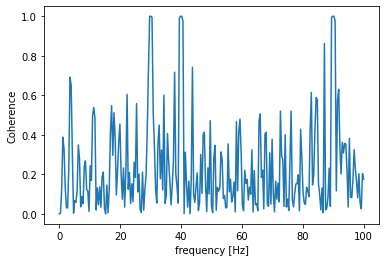

In [5]:
coher = (np.abs(Px1x2)**2)/(Px1*Px2)

plt.plot(freq, coher)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')

## Comparacion


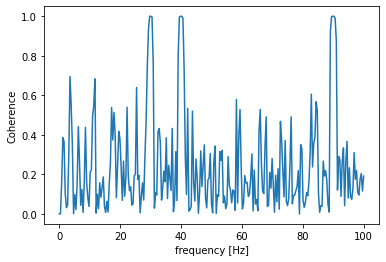

In [10]:
# Calculo de la funcion de coherencia

f, Cxy = signal.coherence(x1,x2,Fs, window='hann', nperseg=512, noverlap=None, nfft=None, detrend='constant', axis=-1)

plt.plot(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()